## **Import Dependency**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.font_manager import findfont, FontProperties
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import plotly.offline as py
import scipy.stats as sp
import re
import matplotlib.pyplot as plt
import string
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier
matplotlib.pyplot.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/Simple Complex Compound/Dataset/Transformation of sentences.xlsx')
#df = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset Version2.csv")

In [5]:
df.head()

,Sentence,TypeOfSentence
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,সরল বাক্য
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,যৌগিক বাক্য
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,জটিল বাক্য
3,দর্শক মাত্রই আশ্চর্য হয়েছে,সরল বাক্য
4,দেখেছে আর আশ্চর্য হয়েছে,যৌগিক বাক্য


In [6]:
Class_Name=[]
for row in df['TypeOfSentence']:
    if row =='সরল বাক্য':
        Class_Name.append('Simple')
    elif row == 'যৌগিক বাক্য':
        Class_Name.append('Compound')
    else:
        Class_Name.append('Complex')
df['TypeOfSentence'] = Class_Name

In [7]:
df.head()

,Sentence,TypeOfSentence
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex
3,দর্শক মাত্রই আশ্চর্য হয়েছে,Simple
4,দেখেছে আর আশ্চর্য হয়েছে,Compound


In [8]:
df.shape

(2727, 2)

In [9]:
df.loc[4]

,4
Sentence,দেখেছে আর আশ্চর্য হয়েছে
TypeOfSentence,Compound


In [10]:
df.iloc[50:65]

,Sentence,TypeOfSentence
50,সময়ে ডাক্তার আসার কারনে রোগী বেঁচে যায়,Simple
51,তিনি ধনী হয়েও সুখী ছিলেন না,Simple
52,দরিদ্র হওয়া সত্বেও তিনি অসৎ নন,Simple
53,স্যার আসবে এবং আমি যাবো,Compound
54,সময়ে ডাক্তার আসলে তবে রোগী মারা যেত না,Compound
55,সময়ে ডাক্তার আসলো এবং রোগী বেঁচে যায়,Compound
56,"তিনি ধনী ছিলেন,কিন্তু সুখী ছিলেন না",Compound
57,"তিনি দরিদ্র,কিন্তু অসৎ নন",Compound
58,যদি স্যার আসে তবে আমি যাব,Complex
59,যদি সময়ে ডাক্তার আসত তবে রোগী মারা যেত না,Complex


## **Checking Null Value**

In [11]:
df.isnull().sum()

,0
Sentence,0
TypeOfSentence,0


In [12]:
print("%18s %10s   %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NaN Values"))
for col in df.columns:
    dtyp = df[col].dtype
    uniq = df[col].nunique()
    na = df[col].isna().sum()
    print("%18s %10s %10s %10s" % (col, dtyp, uniq, na))

       Column Name  Data Type    #Distinct NaN Values
          Sentence     object       2696          0
    TypeOfSentence     object          3          0


In [13]:
df.shape

(2727, 2)

**Check DataTypes**

In [14]:
df.dtypes

,0
Sentence,object
TypeOfSentence,object


**Check Columns**

In [15]:
df.columns

Index(['Sentence', 'TypeOfSentence'], dtype='object')

**Check Number Of Unique Sentence Per Columns**


In [16]:
df.nunique()

,0
Sentence,2696
TypeOfSentence,3


In [17]:
print("Total Sentence:",len(df),
      "\nTotal সরল বাক্য:",len(df[df.TypeOfSentence  =='Simple']),
      "\nTotal যৌগিক বাক্য:",len(df[df.TypeOfSentence=='Compound']),
      "\nTotal জটিল বাক্য:",len(df[df.TypeOfSentence =='Complex']))

Total Sentence: 2727 
Total সরল বাক্য: 913 
Total যৌগিক বাক্য: 902 
Total জটিল বাক্য: 912


**Show Duplicate Sentences**

In [18]:
df.shape

(2727, 2)

In [19]:
df.groupby(['TypeOfSentence', 'Sentence']).size().reset_index(name='counts').sort_values(['counts'], ascending=False).head(5)

,TypeOfSentence,Sentence,counts
650,Complex,যে পড়াশোনা করে সেই জ্ঞানী,2
15,Complex,আমরা যখন ভালো থাকি তখন সকলেই ভালো থাকে,2
1429,Compound,দেবে এবং নেবে,2
2625,Simple,সুন্দরী হওয়ার পাশাপাশি মেয়েটি বুদ্ধিমান।,2
2332,Simple,ধার্মিকেরা সুখী,2


**Remove Duplicate Sentences**

In [20]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [21]:
df.shape

(2703, 2)

In [22]:
file_path = '/content/drive/MyDrive/Simple Complex Compound/Dataset/Fresh.xlsx'

In [23]:
# df.to_excel(file_path, index=False)

## **Data Cleaning and Preparation**

In [24]:
sample_data = [4,52,710,940]
for i in sample_data:
      print(df.Sentence[i],'\n','Detacted as:-- ',df.TypeOfSentence[i],'\n')

দেখেছে আর আশ্চর্য হয়েছে 
 Detacted as:--  Compound 

দরিদ্র হওয়া সত্বেও তিনি অসৎ নন 
 Detacted as:--  Simple 

যারা ধার্মিক তারা সুখী 
 Detacted as:--  Complex 

তার বয়স কম হলেও ভাল আলোচনা করে 
 Detacted as:--  Simple 



In [25]:
s_word =pd.read_excel('/content/drive/MyDrive/Simple Complex Compound/Dataset/stopwords_bangla.xlsx')
stop = s_word['words'].tolist()

In [26]:
display(s_word)

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [27]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [28]:
df.groupby(['TypeOfSentence', 'Sentence']).size().reset_index(name='counts').sort_values(['counts'], ascending=False).head()

,TypeOfSentence,Sentence,counts
2702,Simple,হোটেলে পৌঁছানোর পর তারা আমাদের জানিয়ে দেবে।,1
0,Complex,তিনি যত কঠোর পরিশ্রম করেন তত জীবনে উন্নতি করা...,1
1,Complex,যদি আমায় তুমি বাঁচাও তবে তোমার নিখিল ভুবন ধন্...,1
2,Complex,যদি তিনি আসেন তাহলে আর চিন্তা কী?,1
3,Complex,অফিসার যা অপরাধ করেছেন তা উপেক্ষা করা যায় না।,1


In [29]:
df.shape

(2703, 2)

In [30]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Simple Complex Compound/Code File/stopwords-bn.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [31]:
#path='/content/drive/MyDrive/Working Place/Dataset/Dataset Version2.csv'
path = '/content/drive/MyDrive/Dataset/Dataset Version2.csv'

In [32]:
df.head()

,Sentence,TypeOfSentence
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex
3,দর্শক মাত্রই আশ্চর্য হয়েছে,Simple
4,দেখেছে আর আশ্চর্য হয়েছে,Compound


In [33]:
def cleanTxt(df):
  number=re.sub("[^a-zA-Z]","",str(string))
  return df
df['Sentence'] = df['Sentence'].apply(cleanTxt)
df.head()

,Sentence,TypeOfSentence
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex
3,দর্শক মাত্রই আশ্চর্য হয়েছে,Simple
4,দেখেছে আর আশ্চর্য হয়েছে,Compound


**Removing unnecessary punctuations:**

In [34]:
def process_comments(mysen):
    mysen = re.sub('[^\u0980-\u09FF]',' ',str(mysen))
    return mysen
df['Cleaned_Sentence'] = df['Sentence'].apply(process_comments)

# print some cleaned reviews from the dataset
sample_data = [10,100,25,254,266,100,189,170,200,250,140,150]
for i in sample_data:
     print('Original:\n',df.Sentence[i],'\nCleaned:\n',
           df.Cleaned_Sentence[i],'\n','Sentence:-- ',df.TypeOfSentence[i],'\n')

Original:
 যদিও সে অসুস্থ তবুও স্কুলে গেল 
Cleaned:
 যদিও সে অসুস্থ তবুও স্কুলে গেল 
 Sentence:--  Complex 

Original:
 টিভি দেখলেও বেশিক্ষণ দেখবে না 
Cleaned:
 টিভি দেখলেও বেশিক্ষণ দেখবে না 
 Sentence:--  Simple 

Original:
 সুসংবাদটা পেয়ে সে আনন্দিত হলাে 
Cleaned:
 সুসংবাদটা পেয়ে সে আনন্দিত হলাে 
 Sentence:--  Simple 

Original:
 শীলা একটি কুকুর কিনে তার নাম রাখল টমি 
Cleaned:
 শীলা একটি কুকুর কিনে তার নাম রাখল টমি 
 Sentence:--  Simple 

Original:
 আমরা বাজারে গিয়েছিলাম, এবং সব সবজি কিনলাম 
Cleaned:
 আমরা বাজারে গিয়েছিলাম  এবং সব সবজি কিনলাম 
 Sentence:--  Compound 

Original:
 টিভি দেখলেও বেশিক্ষণ দেখবে না 
Cleaned:
 টিভি দেখলেও বেশিক্ষণ দেখবে না 
 Sentence:--  Simple 

Original:
 সে পড়তে বসলো ঘর ঝাড়ু মুছার পরে 
Cleaned:
 সে পড়তে বসলো ঘর ঝাড়ু মুছার পরে 
 Sentence:--  Simple 

Original:
 সে বললো এবং বাড়িমুখো রওনা দিলো 
Cleaned:
 সে বললো এবং বাড়িমুখো রওনা দিলো 
 Sentence:--  Compound 

Original:
 যে ছেলেটি এখানে এসেছিল, সে আমার ভাই 
Cleaned:
 যে ছেলেটি এখানে এসেছিল  সে আমার ভাই 


In [35]:
df['length'] = df['Cleaned_Sentence'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['Cleaned_Sentence'].apply(lambda cleaned: len(cleaned))

After Cleaning: 
Removed 0 Small conversations 
Total conversations: 2703


In [36]:
dataset

,Sentence,TypeOfSentence,Cleaned_Sentence,length,no_char
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,সন্ধ্যায় পাখিরা বাসায় ফেরে,4,26.0
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,6,32.0
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,7,36.0
3,দর্শক মাত্রই আশ্চর্য হয়েছে,Simple,দর্শক মাত্রই আশ্চর্য হয়েছে,4,26.0
4,দেখেছে আর আশ্চর্য হয়েছে,Compound,দেখেছে আর আশ্চর্য হয়েছে,4,23.0
...,...,...,...,...,...
2698,অতি পরিচিত লোক গুণী হলেও উপযুক্ত মর্যাদা পায় না,Simple,অতি পরিচিত লোক গুণী হলেও উপযুক্ত মর্যাদা পায় না,9,30.0
2699,অসৎ উপায়ে অর্জিত ধন অকাজে নষ্ট হয়,Simple,অসৎ উপায়ে অর্জিত ধন অকাজে নষ্ট হয়,7,36.0
2700,খারাপ কিছু থাকার চেয়ে না থাকাই ভালো,Simple,খারাপ কিছু থাকার চেয়ে না থাকাই ভালো,7,29.0
2701,অপচয় করবে না এবং অভাব হবে না,Compound,অপচয় করবে না এবং অভাব হবে না,7,54.0


In [37]:
dataset.shape

(2703, 5)

# **Unigram Distribution**

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
x = ['অন্ধকার হয়ে আসছে এখনো আমরা হোটেলে পৌঁছাইনি']

In [40]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

get_top_n_words(x,3)

[('অন', 1), ('ধক', 1), ('হয', 1)]

In [41]:
unigram_words = get_top_n_words(df['Cleaned_Sentence'],20)
unigram_words

[('আম', 766),
 ('কর', 708),
 ('এব', 423),
 ('তখন', 296),
 ('যখন', 292),
 ('যদ', 206),
 ('হব', 204),
 ('পর', 197),
 ('জন', 193),
 ('তব', 184),
 ('আমর', 180),
 ('অন', 175),
 ('একট', 171),
 ('হয', 168),
 ('বল', 146),
 ('করত', 145),
 ('হল', 132),
 ('আপন', 129),
 ('বন', 128),
 ('এট', 113)]

# **Bigram Distribution**

In [42]:
y = ['অন্ধকার হয়ে আসছে এখনো আমরা হোটেলে পৌঁছাইনি']

In [43]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)

[('অন ধক', 1), ('ধক হয', 1), ('হয আসছ', 1)]

In [44]:
bigram_words = get_top_n_words(df['Cleaned_Sentence'],20)
bigram_words

[('যখন আম', 57),
 ('পছন কর', 51),
 ('এব আম', 50),
 ('কর এব', 46),
 ('কথ বল', 46),
 ('পর রম', 42),
 ('তখন আম', 42),
 ('হওয় বত', 40),
 ('যখন তখন', 38),
 ('আম আম', 36),
 ('কর তব', 30),
 ('বন কর', 29),
 ('যদ তব', 29),
 ('এব আমর', 29),
 ('আম একট', 26),
 ('কঠ পর', 24),
 ('রম কর', 23),
 ('তব আম', 23),
 ('যদ আম', 23),
 ('আম বন', 22)]

# **Tigram Distribution**

In [45]:
z = ['অন্ধকার হয়ে আসছে এখনো আমরা হোটেলে পৌঁছাইনি']

In [46]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('অন ধক হয', 1), ('ধক হয আসছ', 1), ('হয আসছ এখন', 1)]

In [47]:
trigram_words = get_top_n_words(df['Cleaned_Sentence'],20)
trigram_words

[('কঠ পর রম', 24),
 ('পর রম কর', 23),
 ('সত কথ বল', 13),
 ('কর বন কর', 12),
 ('চল চল অস', 10),
 ('চল অস হচ', 10),
 ('পর কল পন', 9),
 ('আপন অবশ যই', 9),
 ('হব অন যথ', 9),
 ('যখন আম তখন', 8),
 ('আম এট সম', 8),
 ('অধ যয কর', 8),
 ('বন সফল হয', 7),
 ('যখন হব তখন', 7),
 ('আম পছন কর', 7),
 ('কর তব আপন', 7),
 ('অধ যয করত', 7),
 ('অন যথ আপন', 7),
 ('যখন আম আম', 7),
 ('রম কর এব', 6)]

In [48]:
df.head()

,Sentence,TypeOfSentence,Cleaned_Sentence,length
0,সন্ধ্যায় পাখিরা বাসায় ফেরে,Simple,সন্ধ্যায় পাখিরা বাসায় ফেরে,4
1,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,Compound,সন্ধ্যা হয় এবং পাখিরা বাসায় ফেরে,6
2,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,Complex,যখন সন্ধ্যা হয় তখন পাখিরা বাসায় ফেরে,7
3,দর্শক মাত্রই আশ্চর্য হয়েছে,Simple,দর্শক মাত্রই আশ্চর্য হয়েছে,4
4,দেখেছে আর আশ্চর্য হয়েছে,Compound,দেখেছে আর আশ্চর্য হয়েছে,4


# **Data Visualization**

In [49]:
from matplotlib.font_manager import findfont, FontProperties
import matplotlib.font_manager as fm

In [50]:
path = '/content/drive/MyDrive/Working Place/NotoSerifBengali/NotoSerifBengali-Black.ttf'
fontprop = fm.FontProperties(fname=path)

In [51]:
# print(f'Total number of headlines: {len(df)}')
# sns.set(font_scale=1.4)
# prop=FontProperties()
# df['TypeOfSentence'].value_counts().plot(kind='barh', figsize=(6, 4))
# plt.xlabel("No Of sentence", labelpad=12,fontproperties=fontprop)
# plt.ylabel("Type of sentence", labelpad=12,fontproperties=fontprop)
# plt.yticks(rotation = 45,fontproperties=fontprop)
# plt.title("Dataset Distribution", y=1.02);

In [52]:
temp1 = df.groupby('TypeOfSentence').count()['Cleaned_Sentence'].reset_index().sort_values(by='Cleaned_Sentence',ascending=False)
temp1.style.background_gradient(cmap='Purples')

,TypeOfSentence,Cleaned_Sentence
2,Simple,904
0,Complex,902
1,Compound,897


In [53]:
from plotly import graph_objs as go
print("On Train Set....")
fig = go.Figure(go.Funnelarea(
    text =temp1.TypeOfSentence,
    values = temp1.Cleaned_Sentence,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on Dataset"}
    ))
fig.show()

On Train Set....


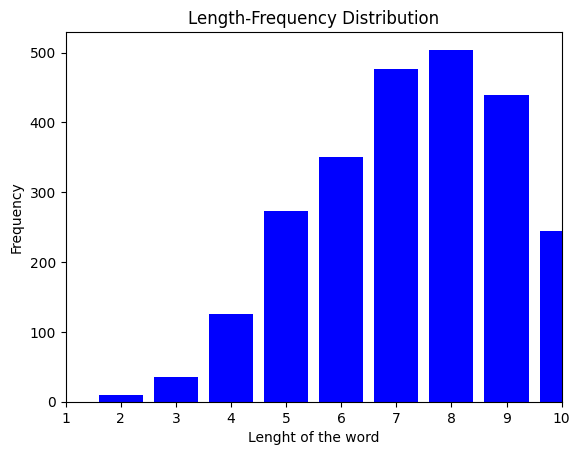

Maximum Length of a Sentence: 17
Minimum Length of a Sentence: 2
Average Length of a Sentence: 8.0


In [54]:
frequency = dict()
for i in dataset.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 10)

plt.xlabel('Lenght of the word')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Sentence: {max(dataset.length)}")
print(f"Minimum Length of a Sentence: {min(dataset.length)}")
print(f"Average Length of a Sentence: {round(np.mean(dataset.length),0)}")

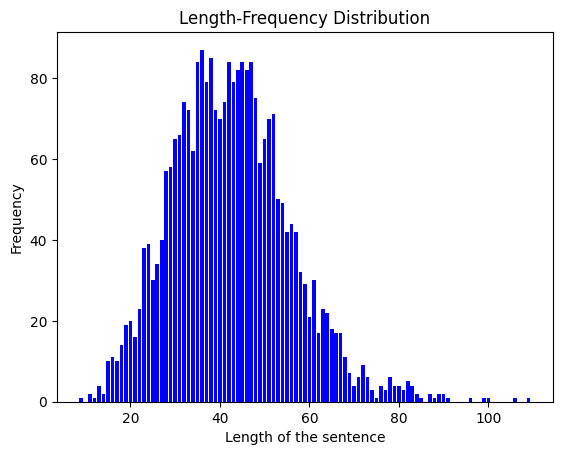

Maximum Character Length of a Sentence: 109
Minimum Character Length of a Sentence: 9
Average Character Length of a Sentence: 43.0


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'dataset' and the column with sentences is named 'Sentence'
# Calculate the character length of each sentence
dataset['char_length'] = dataset['Sentence'].apply(len)

frequency = dict()
for i in dataset.char_length:
    frequency[i] = frequency.get(i, 0) + 1

plt.bar(frequency.keys(), frequency.values(), color="blue")
plt.xlabel('Length of the sentence')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()

print(f"Maximum Character Length of a Sentence: {max(dataset.char_length)}")
print(f"Minimum Character Length of a Sentence: {min(dataset.char_length)}")
print(f"Average Character Length of a Sentence: {round(np.mean(dataset.char_length), 0)}")

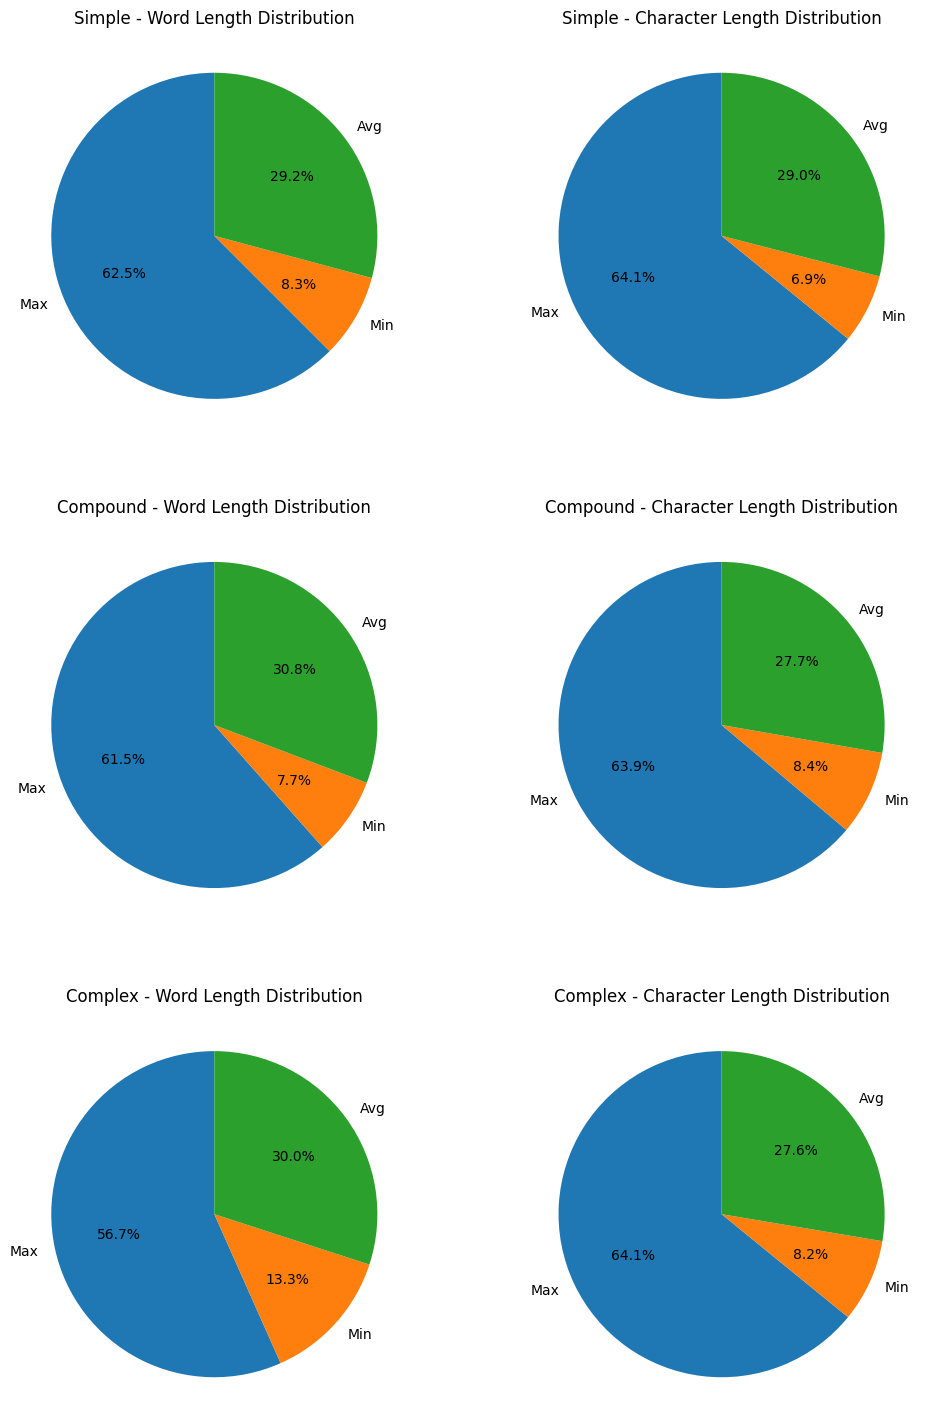

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'dataset', and the columns are 'Sentence' and 'TypeOfSentence'
# Calculate the word length of each sentence
dataset['word_length'] = dataset['Sentence'].apply(lambda x: len(x.split()))

# Calculate the character length of each sentence
dataset['char_length'] = dataset['Sentence'].apply(len)

# Sentence types
sentence_types = dataset['TypeOfSentence'].unique()

# Calculate metrics for each sentence type
results = {}
for sentence_type in sentence_types:
    subset = dataset[dataset['TypeOfSentence'] == sentence_type]

    max_word_length = max(subset.word_length)
    min_word_length = min(subset.word_length)
    avg_word_length = round(np.mean(subset.word_length), 0)

    max_char_length = max(subset.char_length)
    min_char_length = min(subset.char_length)
    avg_char_length = round(np.mean(subset.char_length), 0)

    results[sentence_type] = {
        'word': [max_word_length, min_word_length, avg_word_length],
        'char': [max_char_length, min_char_length, avg_char_length]
    }

# Plot pie charts for each sentence type
fig, ax = plt.subplots(len(sentence_types), 2, figsize=(12, 6 * len(sentence_types)))

for i, sentence_type in enumerate(sentence_types):
    word_data = results[sentence_type]['word']
    char_data = results[sentence_type]['char']

    labels = ['Max', 'Min', 'Avg']

    # Plot word length pie chart
    ax[i, 0].pie(word_data, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i, 0].set_title(f'{sentence_type} - Word Length Distribution')

    # Plot character length pie chart
    ax[i, 1].pie(char_data, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i, 1].set_title(f'{sentence_type} - Character Length Distribution')

plt.show()


# **Dataset Summary**

In [57]:
category_list=df.TypeOfSentence.unique()
category_list

array(['Simple', 'Compound', 'Complex'], dtype=object)

In [58]:
from collections import Counter

In [59]:
for i in category_list:
    temp=df.loc[df['TypeOfSentence'] == str(i)]
    #display(temp)
    temp['temp_list'] = df['Cleaned_Sentence'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    temp = temp.style.set_caption('Top 20 Words In '+ str(i)+" Sentence")
    display(temp)

,Common_words,count
0,না,160
1,আমি,108
2,সে,91
3,স্বত্তেও,77
4,তিনি,74
5,আমার,74
6,করে,73
7,তার,71
8,কারনে,69
9,আমরা,57


,Common_words,count
0,এবং,417
1,কিন্তু,167
2,আমি,142
3,না,132
4,সে,127
5,তিনি,114
6,তাই,78
7,আমার,77
8,হবে,70
9,করে,69


,Common_words,count
0,তখন,287
1,যখন,285
2,যেহেতু,184
3,সেহেতু,182
4,না,168
5,সে,167
6,আমি,149
7,যদিও,138
8,তিনি,133
9,তবুও,92


In [60]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Cleaned_Sentence) for word in t.strip().split()]
    class_label= [k for k,v in dataset.TypeOfSentence.value_counts().to_dict().items()]

    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.TypeOfSentence==label].Cleaned_Sentence) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.TypeOfSentence==label].Cleaned_Sentence)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.TypeOfSentence==label].Cleaned_Sentence))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label
documents,words,u_words,class_names = data_summary(df)


Class Name :  Simple
Number of Documents:904
Number of Words:5981
Number of Unique Words:2263
Most Frequent Words:

না	160
আমি	108
সে	91
স্বত্তেও	77
তিনি	74
আমার	74
করে	73
তার	71
কারনে	69
আমরা	57

Class Name :  Complex
Number of Documents:902
Number of Words:7837
Number of Unique Words:2269
Most Frequent Words:

তখন	287
যখন	285
যেহেতু	184
সেহেতু	182
না	168
সে	167
আমি	149
যদিও	138
তিনি	133
তবুও	92

Class Name :  Compound
Number of Documents:897
Number of Words:6957
Number of Unique Words:2242
Most Frequent Words:

এবং	417
কিন্তু	167
আমি	142
না	132
সে	127
তিনি	114
তাই	78
আমার	77
হবে	70
করে	69
Total Number of Unique Words:2807


# **New Dataframe for Data Summary**

In [61]:
data_matrix = pd.DataFrame({'Total Sentence':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
new_df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(new_df)

  Class Names        Category  Values
0      Simple  Total Sentence     904
1     Complex  Total Sentence     902
2    Compound  Total Sentence     897
3      Simple     Total Words    5981
4     Complex     Total Words    7837
5    Compound     Total Words    6957
6      Simple    Unique Words    2263
7     Complex    Unique Words    2269
8    Compound    Unique Words    2242


In [62]:
from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Simple Complex Compound/Font/kalpurush-2.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

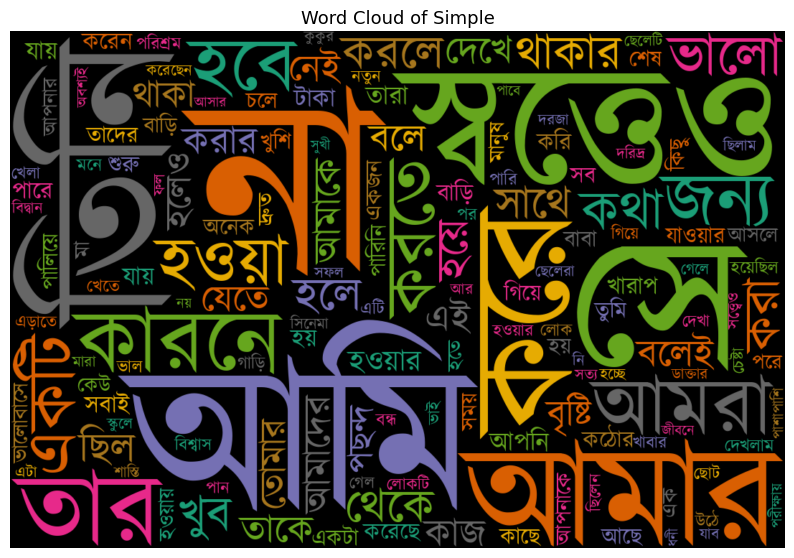

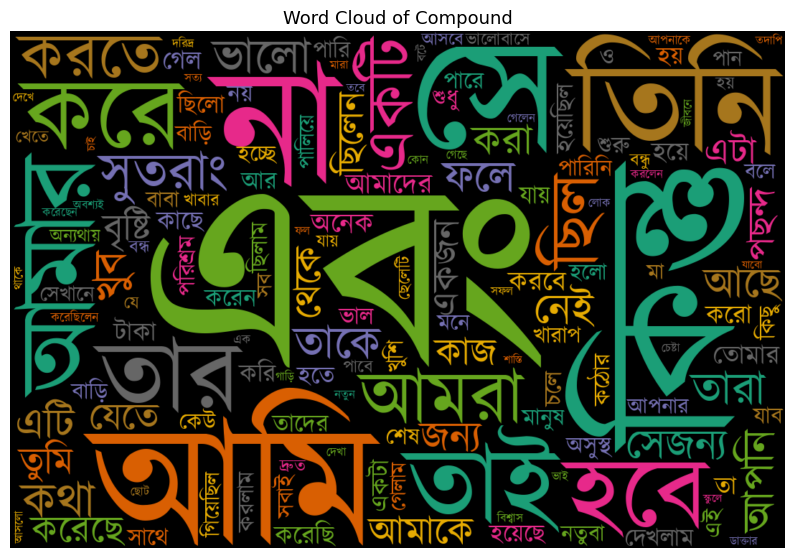

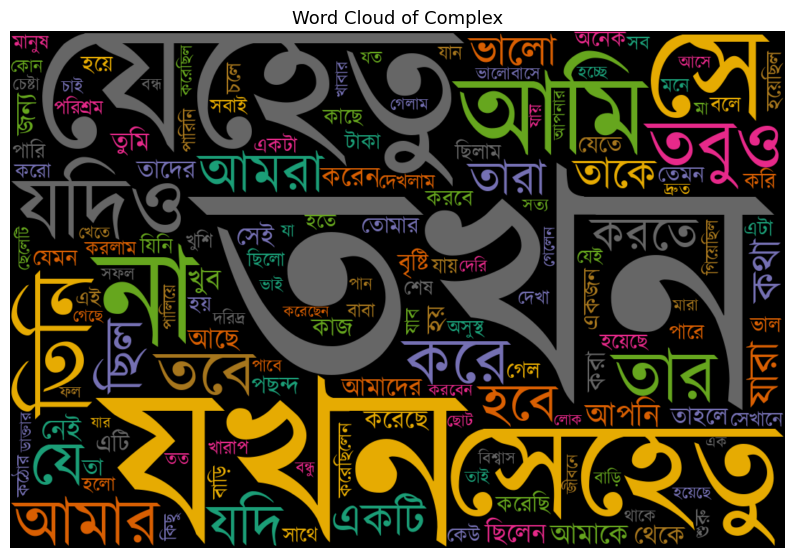

In [63]:
for i in category_list:
    temp=df.loc[df['TypeOfSentence'] == str(i)]
    #display(temp)
    temp['temp_list'] = df['Cleaned_Sentence'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))

# **Data Summary Visualization**

In [64]:
new_df

,Class Names,Category,Values
0,Simple,Total Sentence,904
1,Complex,Total Sentence,902
2,Compound,Total Sentence,897
3,Simple,Total Words,5981
4,Complex,Total Words,7837
5,Compound,Total Words,6957
6,Simple,Unique Words,2263
7,Complex,Unique Words,2269
8,Compound,Unique Words,2242


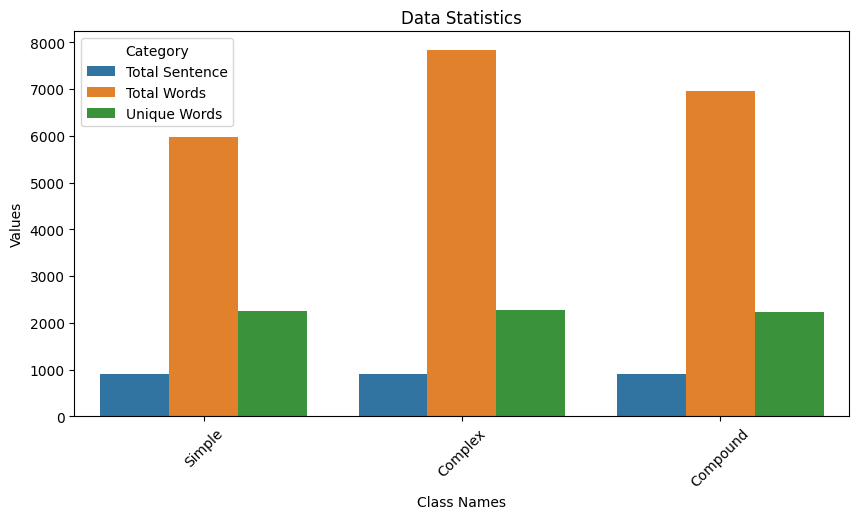

In [65]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()

sns.barplot(data=new_df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

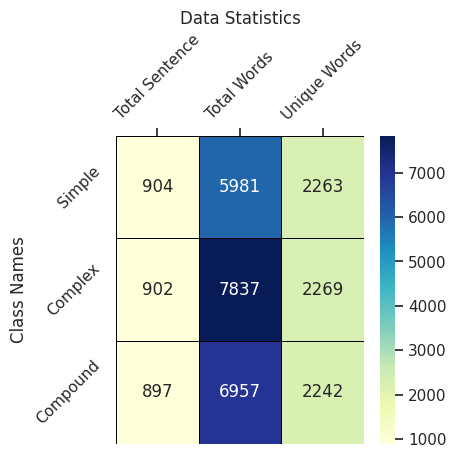

In [66]:
sns.set()
plt.figure(figsize =(4, 4))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)

ax.set_ylabel('Class Names')
ax.set_title('Data Statistics')
y_label = ["Total Sentence", "Total Words", "Unique Words"]
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()

# **Label Encoding Function**

In [67]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

# **Dataset Splitting Function**

In [68]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [69]:
dataset.cleaned = dataset.Cleaned_Sentence.apply(lambda x:x.replace('\n',' '))

In [70]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(Conversations)

    return tfidf,X

## **Importing ML Classifiers**

### *Classifiers Defination*

In [71]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    knn_model = KNeighborsClassifier(n_neighbors=24)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','sgd']

    ml_models = [lr_model,dt_model,rf_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names

***Model Evaluation Function***

In [72]:
def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)

    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y,pos_label = 'positive', average = 'micro'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y,pos_label = 'positive', average = 'micro'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,pos_label = 'positive', average = 'micro'),4)*100

    return my_dict

***Model Performane into Dataframe***

In [73]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []

    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

***Save the performance of the model for each gram feature***

In [74]:
import json

In [76]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
     tfidf,feature = calc_gram_tfidf(dataset.cleaned)
     labels = label_encoding(dataset.TypeOfSentence,False)
     X_train,X_test,y_train,y_test = dataset_split(feature,labels)
     ml_models,model_names = ml_models_defination()
     accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy,f)

Feature Size :======> 23333

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2703 
	Training		 2162 
	Test			 541


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'squared_error', 'squared_hinge', 'log_loss', 'perceptron', 'hinge', 'huber', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'modified_huber'}. Got 'log' instead.

***Table for Accuracy along with Precision, Recall and F1_Score***

In [ ]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

***Select best classifier model***

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model.score(X_test,y_test)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(feature, labels,test_size=0.3)

***Confusion matrix***

In [ ]:
y_test

In [ ]:
y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize =(4, 4))
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16)
plt.ylabel('True Label',fontsize=14)
plt.xlabel('Predicted Label',fontsize=14)
ax.xaxis.set_ticklabels(class_names, rotation=45);
ax.yaxis.set_ticklabels(class_names, rotation=45);
plt.savefig('Confusion Matrix.png')

In [ ]:
y_pred

In [ ]:
plt.subplots(figsize = (10,5))
plt.title("Total Data",fontsize=24)
plt.ylabel('Count',fontsize=24)
sns.countplot(x='TypeOfSentence', data=df)
plt.show()
plt.savefig('Total Data.png')

In [ ]:
# ax = sns.countplot(x="TypeOfSentence", data=df)

# ax.bar_label(ax.containers[0], label_type='edge')
# plt.show()

In [ ]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0,4,1,1])
langs = df3['Model Name']
students = df3['Accuracy']
ax.bar(langs,students)
plt.title("Accuracy",fontsize=24)
plt.ylabel("Score",fontsize=24)
plt.savefig('Accuracy.png')
plt.show()

In [ ]:
fig = plt.figure(figsize = (8, 3))
ax = fig.add_axes([0,4,1,1])
langs = df3['Model Name']
students = df3['Precision']
ax.bar(langs,students)
plt.title("Precision",fontsize=24)
plt.ylabel("Score",fontsize=24)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 3))
ax = fig.add_axes([0,4,1,1])
langs = df3['Model Name']
students = df3['Recall']
ax.bar(langs,students)
plt.title("Recall",fontsize=24)
plt.ylabel("Score",fontsize=24)
plt.show()

In [ ]:
file = open('Decision_Tree.pkl', 'wb')
pickle.dump(dt_model, file)

In [ ]:
model = open('/content/Decision_Tree.pkl','rb')
svm_model = pickle.load(model)
Comment =  'আমি চলে এসেছি তাই তুমি যেও'
processed_conversation = process_conversations(Comment)
if (len(processed_conversation))>0:
    cv,feature_vector = calc_gram_tfidf(dataset.cleaned)
    feature = cv.transform([processed_conversation]).toarray()
    Result = dt_model.predict(feature)
    if (Result == 0):
        print(f"Simple Sentence")
    elif (Result==1):
        print(f"Compound Sentence")
else:
    print("Complex Sentence")